In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#Declare Base using automap_base()
Base = automap_base()

In [6]:
# reflect an existing database into a new model

Base.prepare(engine, reflect=True)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data 
#import inspector to analyze the tables
from sqlalchemy import inspect

In [11]:
#inspect the tables
inspector = inspect(engine)

In [12]:
#iterate through the tables to find out the column names and data types
#column names for measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
    


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# column names for station table
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
#most recent date in data set
recent_date = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()
print(f"Most recent date: {recent_date[0]}")

Most recent date: 2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

latest_date = dt.datetime.strptime(recent_date[0],'%Y-%m-%d')
datequery = dt.date(latest_date.year - 1, latest_date.month, latest_date.day)
datequery

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
precipitation_sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*precipitation_sel).filter(Measurement.date >= datequery).all()

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precipitation_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [18]:
precipitation_df.set_index('Date', inplace = True)

precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [19]:
precipitation_df.sort_index(inplace = True)


In [20]:
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [21]:
precipitation_df = precipitation_df.dropna(how ='any')
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [22]:
# # Sort the dataframe by date by setting date as index and dropping all null values
# precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
# precipitation_df= precipitation_df.dropna(how='any')
# precipitation_df=precipitation_df.set_index("Date")
# precipitation_df.head()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data - ALTERNATE METHOD
count_p = (precipitation_df['Precipitation']).count()
mean_p = (precipitation_df['Precipitation']).mean()
min_p = (precipitation_df['Precipitation']).min()
max_p  = (precipitation_df['Precipitation']).max()
std_p = (precipitation_df['Precipitation']).std()
Twentyfifth_q= (precipitation_df['Precipitation']).quantile(0.25)
Fiftieth_q= (precipitation_df['Precipitation']).quantile(0.50)
Seventyfifth_q= (precipitation_df['Precipitation']).quantile(0.75)
print (f" precipitation count is: {count_p}")
print (f" precipitation mean is: {mean_p}")
print (f" precipitation minimum is: {min_p}")
print (f" precipitation maximum is: {max_p}")
print (f" precipitation Standard Deviation is: {std_p}")
print (f" precipitation 25th quartile: {Twentyfifth_q}")
print (f" precipitation 50th quartile: {Fiftieth_q}")
print (f" precipitation 75th quartile: {Seventyfifth_q}")

 precipitation count is: 2021
 precipitation mean is: 0.17727857496288899
 precipitation minimum is: 0.0
 precipitation maximum is: 6.7
 precipitation Standard Deviation is: 0.46118950388770263
 precipitation 25th quartile: 0.0
 precipitation 50th quartile: 0.02
 precipitation 75th quartile: 0.13


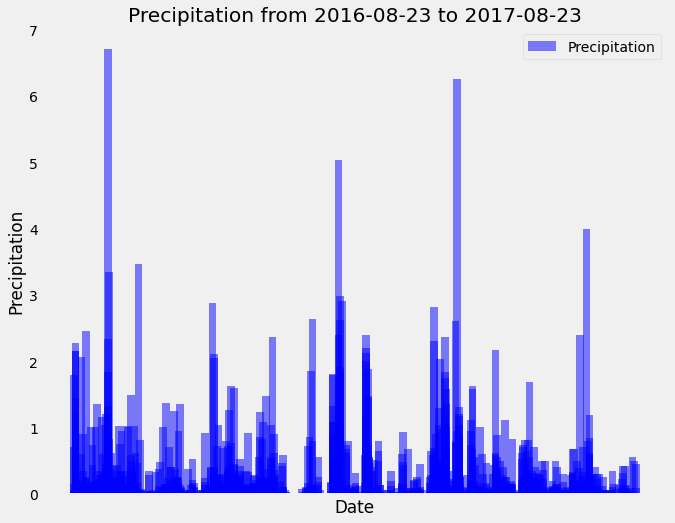

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data

#change precipitation index (date) into a list for the y axis and the precipitation values into a list for the x axis

y_axis = precipitation_df['Precipitation'].tolist()
x_axis = precipitation_df.index.tolist()
plt.figure(figsize = (10,8))
plt.bar(x_axis, y_axis, width = 5, color ='b', align = 'center', alpha = 0.5, label  ='Precipitation' )
plt.tick_params( axis='x',which='both',top=False,labelbottom=False) 
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

plt.title ("Precipitation from 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel('Precipitation')
plt.grid (which = 'major', axis = 'both', linestyle = '-')
plt.legend()
plt.savefig("precipitation.png")
plt.show()

# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.id)]
activestations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
    
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most active station id is USC00519281

session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

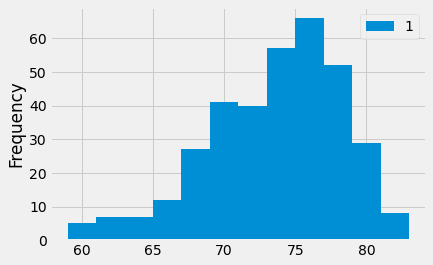

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram\
highest_tobs_station = activestations[0][0]

highest_tobs_result = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == highest_tobs_station).all()

# convert to dataframe
highest_tobs_df = pd.DataFrame(highest_tobs_result)

# historgram 
highest_tobs_df.plot.hist(bins=12)


# Close session

In [39]:
# Close Session
session.close()